In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#import our dataset
data = pd.read_csv('laptop_data.csv')

In [3]:
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
#Get an idea of the shape of our dataset
data.shape

(1303, 12)

In [5]:
#Get an overview of the columns datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
#Check for duplicate rows
data.duplicated().sum()

0

In [7]:
#Check for missing values
data.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [8]:
#Drop the column that is of no use
data.drop(columns=["Unnamed: 0"],inplace=True)

In [9]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [10]:
#Remove the word "GB" and "kg" from Ram and Weight respectively.
data["Ram"] = data["Ram"].str.replace("GB","")
data["Weight"] = data["Weight"].str.replace("kg","")

In [11]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [12]:
#Convert RAM and Weignt into integer and float respectively
data["Ram"] = data["Ram"].astype("int64")
data["Weight"] = data["Weight"].astype("float64")
data["Price"] = data["Price"].astype("int64")

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 112.1+ KB


In [14]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095


In [15]:
import seaborn as sns

F:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

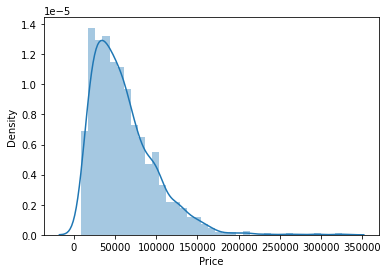

In [16]:
#First we will do Univariate analysis of the Price column
sns.distplot(data["Price"])
#We can observe that the distribution is skewed. We can fix it by applying logarithmic function.

<AxesSubplot:>

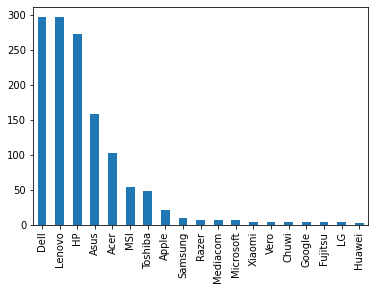

In [17]:
#Now we will clean and apply Feature engineering to our data. Starting with the "Company" column.
data["Company"].value_counts().plot(kind="bar")

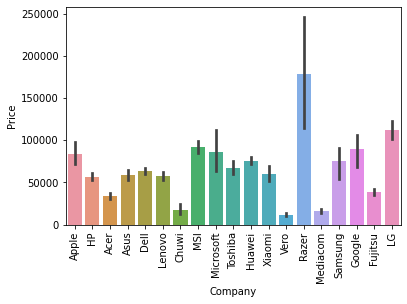

In [18]:
#Checking if we can drop the Company column
sns.barplot(x=data["Company"],y=data["Price"])
plt.xticks(rotation="vertical")
plt.show()
#No we cannot drop company column as the price of laptops are affected by the company as expected.

<AxesSubplot:>

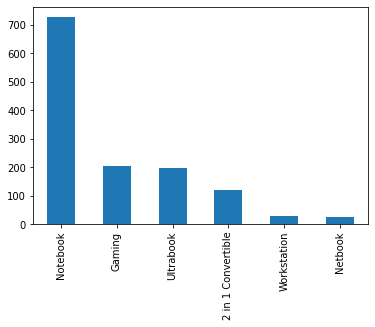

In [19]:
#Now let's move on to the next column i.e. TypeName
data["TypeName"].value_counts().plot(kind='bar')

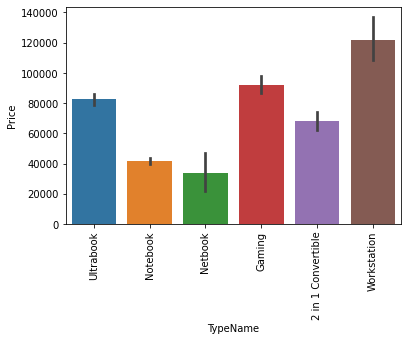

In [20]:
#Checking if we can drop the "TypeName" column
sns.barplot(x=data["TypeName"],y=data["Price"])
plt.xticks(rotation="vertical")
plt.show()
#No we cannot drop TypeName column as the price of laptops are affected by the company as expected.

F:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Inches', ylabel='Density'>

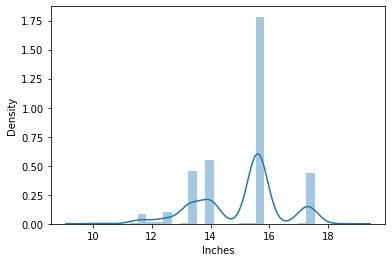

In [21]:
#Now let's move on to the next column i.e. Inches column
#univariate analysis
sns.distplot(data["Inches"])
#Not useful

<AxesSubplot:xlabel='Inches', ylabel='Price'>

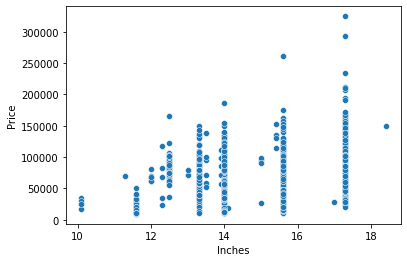

In [22]:
sns.scatterplot(x=data["Inches"],y=data["Price"])
#There exist a slight correlation between size and price. So we can't drop Inches for now.

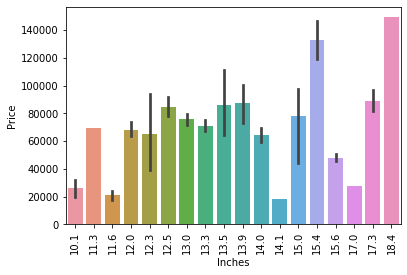

In [23]:
sns.barplot(x=data["Inches"],y=data["Price"])
plt.xticks(rotation="vertical")
plt.show()
#Low correlation

In [24]:
data["ScreenResolution"].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [25]:
data["TouchScreen"] = data["ScreenResolution"].apply(lambda x:1 if "Touchscreen" in x else 0)

In [26]:
data.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
368,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,AMD Radeon R7 M445,Windows 10,2.33,47898,0
785,MSI,Gaming,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,1.60,100752,0
1002,Dell,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,4,128GB SSD,Intel HD Graphics 620,Windows 10,2.18,29144,0
346,HP,Notebook,14.0,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.44,14865,0
338,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,1TB HDD,Intel HD Graphics 500,Linux,2.00,14651,0


<AxesSubplot:>

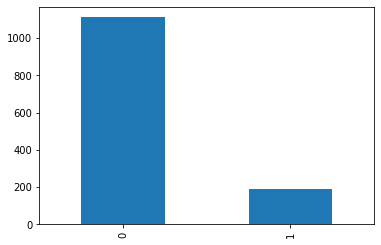

In [27]:
data["TouchScreen"].value_counts().plot(kind="bar")

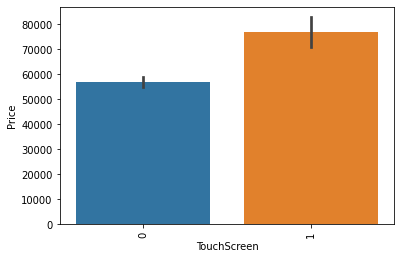

In [28]:
sns.barplot(x=data["TouchScreen"],y=data["Price"])
plt.xticks(rotation="vertical")
plt.show()
#Touchscreen laptops are expensive as compared to normal laptops as expected. This column is useful.

In [29]:
data["IPS"] = data["ScreenResolution"].apply(lambda x:1 if "IPS" in x else 0)

In [30]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1


<AxesSubplot:>

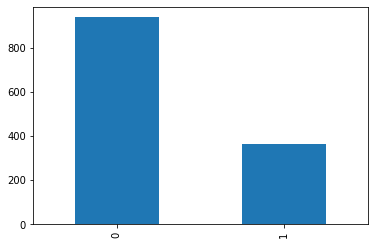

In [31]:
data["IPS"].value_counts().plot(kind="bar")

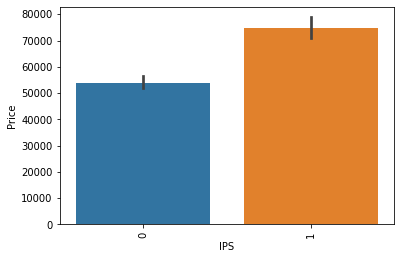

In [32]:
sns.barplot(x=data["IPS"],y=data["Price"])
plt.xticks(rotation="vertical")
plt.show()
#important column

In [33]:
resolution = data["ScreenResolution"].str.split("x",n=1,expand=True)

In [34]:
data["X_res"] = resolution[0]
data["Y_res"] = resolution[1]

In [35]:
data.sample(10)
#Y-resolution is correct
#Need to fix X-resolution.

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
872,Toshiba,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.00,73952,0,1,IPS Panel Full HD 1920,1080
1192,HP,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,1.86,25840,0,0,1366,768
766,Asus,Notebook,17.3,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4,1TB HDD,Nvidia GeForce 920MX,Windows 10,2.80,25059,0,0,1366,768
741,Dell,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,2.00,35431,0,0,1366,768
703,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,1TB HDD + 1TB HDD,Intel HD Graphics 620,Windows 10,2.10,33110,0,0,Full HD 1920,1080
977,Asus,2 in 1 Convertible,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7500U 2.7GHz,16,512GB SSD + 2TB HDD,Nvidia GeForce GTX 950M,Windows 10,2.30,95850,1,0,4K Ultra HD / Touchscreen 3840,2160
23,Dell,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.62,43636,1,0,Full HD / Touchscreen 1920,1080
942,Acer,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,2.23,32980,0,0,1366,768
392,Acer,Notebook,15.6,IPS Panel 1366x768,Intel Core i5 8250U 1.6GHz,12,1TB HDD,Nvidia GeForce MX130,Windows 10,2.20,36975,0,1,IPS Panel 1366,768
536,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,AMD Radeon 530,Windows 10,2.20,42486,0,0,Full HD 1920,1080


In [36]:
data["X_res"] = data["X_res"].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [37]:
data.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
537,HP,Notebook,15.6,Full HD 1920x1080,Intel Pentium Quad Core N3710 1.6GHz,4,256GB SSD,Intel HD Graphics 405,Windows 10,1.86,21258,0,0,1920,1080
520,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,3.20,74538,0,1,1920,1080
207,Dell,Ultrabook,13.3,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.21,103842,1,1,3840,2160
42,Asus,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Nvidia GeForce 940MX,Linux,2.30,27864,0,0,1366,768
523,HP,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.63,36709,0,0,1366,768
164,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,1TB HDD,Intel HD Graphics 500,Windows 10,2.10,18541,0,0,1366,768
624,HP,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 7,1.88,49656,0,0,1366,768
318,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.95,52214,0,0,1920,1080
1108,HP,Notebook,15.6,Full HD 1920x1080,AMD A6-Series 9220 2.5GHz,4,1TB HDD,AMD Radeon R4,Windows 10,2.10,21205,0,0,1920,1080
435,Asus,Gaming,17.3,Full HD 1920x1080,AMD Ryzen 1600 3.2GHz,8,256GB SSD + 1TB HDD,AMD Radeon RX 580,Windows 10,3.20,90309,0,0,1920,1080


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   int64  
 11  TouchScreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   object 
 14  Y_res             1303 non-null   object 
dtypes: float64(2), int64(4), object(9)
memory usage: 152.8+ KB


In [39]:
data["X_res"] = data["X_res"].astype('int64')
data["Y_res"] = data["Y_res"].astype('int64')

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   int64  
 11  TouchScreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 152.8+ KB


In [41]:
data.corr()["Price"]

Inches         0.068196
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252207
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [42]:
#Pixels per inches
data["PPI"] = (((data["X_res"]**2) + (data["Y_res"]**2))**0.5)/data["Inches"].astype('float64')

In [43]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,2560,1600,226.983005


In [44]:
data.drop(columns=['ScreenResolution','X_res','Y_res'],inplace=True)

In [45]:
data.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,226.983005


In [46]:
data["Cpu"].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [47]:
data["Cpu Name"] = data["Cpu"].apply(lambda x:" ".join(x.split()[0:3]))

In [48]:
data.sample(5)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu Name
125,HP,Notebook,15.6,Intel Celeron Dual Core N3060 1.6GHz,4,500GB HDD,Intel HD Graphics 400,No OS,1.86,13799,0,0,100.454670,Intel Celeron Dual
1184,HP,Notebook,15.6,Intel Core i7 6700HQ 2.6GHz,6,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.18,42570,0,1,141.211998,Intel Core i7
897,HP,Notebook,15.6,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04,47952,0,0,141.211998,Intel Core i7
797,Dell,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,128GB SSD,Intel HD Graphics 620,Windows 10,1.95,43156,0,0,100.454670,Intel Core i5
1291,Acer,Notebook,15.6,Intel Celeron Dual Core N3060 1.6GHz,4,500GB HDD,Intel HD Graphics 400,Linux,2.40,15397,0,0,100.454670,Intel Celeron Dual


In [49]:
def Processor(text):
    if text=="Intel Core i7" or text=="Intel Core i5" or text=="Intel Core i3":
        return text
    else:
        if text.split()[0] == "Intel":
            return "Other Intel Processor"
        else:
            return "AMD Processor"

In [50]:
data["Processor"] = data["Cpu Name"].apply(Processor)

In [51]:
data.sample(10)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu Name,Processor
1263,Acer,Notebook,15.6,Intel Celeron Dual Core N3060 1.6GHz,4,500GB HDD,Intel HD Graphics 400,Linux,2.40,15397,0,0,100.454670,Intel Celeron Dual,Other Intel Processor
304,Asus,Gaming,15.6,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.50,67399,0,0,141.211998,Intel Core i7,Intel Core i7
60,Dell,Notebook,17.3,Intel Core i7 8550U 1.8GHz,16,256GB SSD + 2TB HDD,AMD Radeon 530,Windows 10,2.80,69210,0,0,127.335675,Intel Core i7,Intel Core i7
867,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.37,103896,1,1,165.632118,Intel Core i7,Intel Core i7
1272,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201,0,0,111.935204,Intel Celeron Dual,Other Intel Processor
1132,Asus,Notebook,14.0,Intel Celeron Dual Core N3350 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.50,14811,0,0,111.935204,Intel Celeron Dual,Other Intel Processor
709,HP,Notebook,17.3,AMD A10-Series 9620P 2.5GHz,6,2TB HDD,AMD Radeon 530,Windows 10,2.71,34898,0,1,127.335675,AMD A10-Series 9620P,AMD Processor
665,Toshiba,Notebook,15.6,Intel Core i3 6100U 2.1GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,2.10,26533,0,0,100.454670,Intel Core i3,Intel Core i3
1120,Vero,Notebook,13.3,Intel Atom X5-Z8350 1.44GHz,4,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.35,10442,0,0,165.632118,Intel Atom X5-Z8350,Other Intel Processor
537,HP,Notebook,15.6,Intel Pentium Quad Core N3710 1.6GHz,4,256GB SSD,Intel HD Graphics 405,Windows 10,1.86,21258,0,0,141.211998,Intel Pentium Quad,Other Intel Processor


<AxesSubplot:>

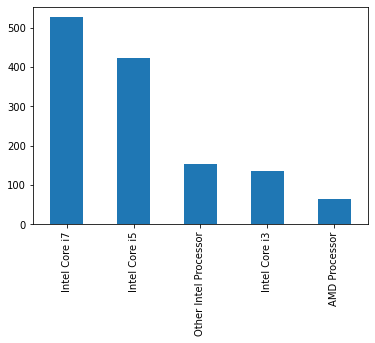

In [52]:
data["Processor"].value_counts().plot(kind="bar")

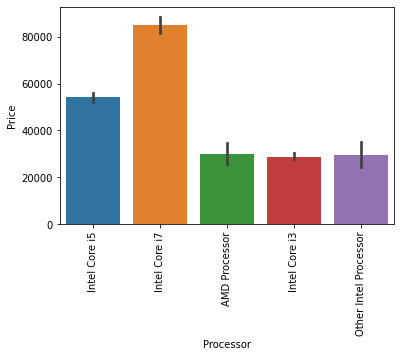

In [53]:
sns.barplot(x=data["Processor"],y=data["Price"])
plt.xticks(rotation="vertical")
plt.show()
#As expected. This column is important.

In [54]:
data.drop(columns=["Cpu","Cpu Name"],inplace=True)

In [55]:
data.sample(10)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Processor
646,Acer,Ultrabook,14.0,8,256GB SSD,Intel Graphics 620,Windows 10,1.80,48964,0,1,157.350512,Intel Core i5
252,Asus,Notebook,15.6,4,1TB HDD,AMD Radeon R5 M420,Windows 10,1.68,24988,0,0,100.454670,AMD Processor
830,Razer,Gaming,17.3,32,512GB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49,292986,1,0,254.671349,Intel Core i7
899,Dell,Notebook,15.6,8,500GB HDD,Intel HD Graphics 620,Windows 10,1.90,49816,0,0,141.211998,Intel Core i5
683,HP,Notebook,17.3,4,256GB SSD,AMD Radeon R5 520,Windows 10,2.50,37242,0,1,127.335675,Intel Core i3
371,Acer,Notebook,15.6,4,128GB SSD,AMD Radeon R5,Windows 10,2.10,22697,0,0,100.454670,AMD Processor
610,Lenovo,Notebook,15.6,32,1TB SSD,Nvidia Quadro M2200M,Windows 10,2.50,261018,0,1,282.423996,Other Intel Processor
451,Dell,Workstation,15.6,16,256GB SSD,Nvidia Quadro M620,Windows 10,2.17,105228,0,1,141.211998,Intel Core i7
109,Lenovo,Notebook,14.0,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.58,78854,0,1,157.350512,Intel Core i7
961,Lenovo,Ultrabook,12.5,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.36,93772,0,1,176.232574,Intel Core i5


<AxesSubplot:>

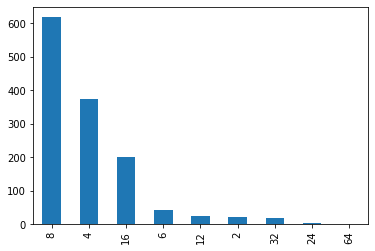

In [56]:
data["Ram"].value_counts().plot(kind="bar")

<AxesSubplot:xlabel='Ram', ylabel='Price'>

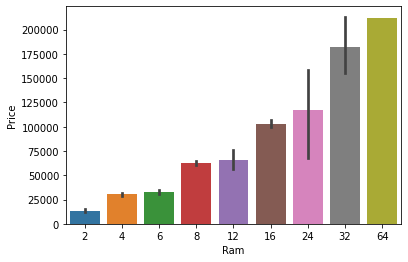

In [57]:
sns.barplot(x=data["Ram"],y=data["Price"])
#Strong relation with price. Important column

In [58]:
data["Memory"].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [59]:
data['Memory'] = data['Memory'].astype(str).replace('\.0', '', regex=True)
data["Memory"] = data["Memory"].str.replace('GB', '')
data["Memory"] = data["Memory"].str.replace('TB', '000')
new = data["Memory"].str.split("+", n = 1, expand = True)

data["first"]= new[0]
data["first"]=data["first"].str.strip()

data["second"]= new[1]

data["Layer1HDD"] = data["first"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer1SSD"] = data["first"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer1Hybrid"] = data["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer1Flash_Storage"] = data["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

data['first'] = data['first'].str.replace(r'\D', '')

data["second"].fillna("0", inplace = True)

data["Layer2HDD"] = data["second"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer2SSD"] = data["second"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer2Hybrid"] = data["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer2Flash_Storage"] = data["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

data['second'] = data['second'].str.replace(r'\D', '')

data["first"] = data["first"].astype(int)
data["second"] = data["second"].astype(int)

data["HDD"]=(data["first"]*data["Layer1HDD"]+data["second"]*data["Layer2HDD"])
data["SSD"]=(data["first"]*data["Layer1SSD"]+data["second"]*data["Layer2SSD"])
data["Hybrid"]=(data["first"]*data["Layer1Hybrid"]+data["second"]*data["Layer2Hybrid"])
data["Flash_Storage"]=(data["first"]*data["Layer1Flash_Storage"]+data["second"]*data["Layer2Flash_Storage"])

data.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)


C:\Users\User\AppData\Local\Temp\ipykernel_4044\598416093.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  data['first'] = data['first'].str.replace(r'\D', '')
C:\Users\User\AppData\Local\Temp\ipykernel_4044\598416093.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
  data['second'] = data['second'].str.replace(r'\D', '')


In [60]:
data.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Processor,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,13.3,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,13.3,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,15.6,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,15.4,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,13.3,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,226.983005,Intel Core i5,0,256,0,0


In [61]:
data.drop(columns = ["Memory"],inplace=True)

In [62]:
data.sample(10)

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Processor,HDD,SSD,Hybrid,Flash_Storage
931,HP,Ultrabook,12.5,4,Intel HD Graphics 520,Windows 10,1.26,84129,0,0,176.232574,Intel Core i5,500,0,0,0
144,HP,Notebook,15.6,4,AMD Radeon R4 Graphics,Windows 10,1.86,19660,0,0,100.454670,AMD Processor,0,256,0,0
346,HP,Notebook,14.0,2,Intel HD Graphics 400,Windows 10,1.44,14865,0,0,111.935204,Other Intel Processor,0,0,0,32
427,Dell,Ultrabook,14.0,8,Intel HD Graphics 620,Linux,1.60,58554,0,0,157.350512,Intel Core i7,0,256,0,0
727,Dell,2 in 1 Convertible,13.3,4,Intel HD Graphics 620,Windows 10,1.71,34578,1,0,165.632118,Intel Core i3,1000,0,0,0
818,Dell,Gaming,17.3,16,Nvidia GeForce GTX 1060,Windows 10,4.36,133467,0,1,127.335675,Intel Core i7,1000,128,0,0
1250,Dell,Notebook,15.6,4,Intel HD Graphics,Linux,2.20,17262,0,0,100.454670,Other Intel Processor,500,0,0,0
1264,Dell,Notebook,15.6,2,Intel HD Graphics,Windows 10,2.20,20193,0,0,100.454670,Other Intel Processor,500,0,0,0
54,Acer,Notebook,15.6,4,Intel HD Graphics 620,Windows 10,2.40,20459,0,0,100.454670,Intel Core i3,1000,0,0,0
373,Lenovo,Notebook,17.3,4,AMD Radeon R5,Windows 10,2.60,26053,0,0,106.113062,AMD Processor,0,128,0,0


In [63]:
data.corr()["Price"]

Inches           0.068196
Ram              0.743007
Weight           0.210370
Price            1.000000
TouchScreen      0.191226
IPS              0.252207
PPI              0.473487
HDD             -0.096442
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [64]:
data.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [65]:
data.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Processor,HDD,SSD
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,135195,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,226.983005,Intel Core i5,0,256


In [66]:
data["Gpu"].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [67]:
data["Gpu brand"] = data["Gpu"].apply(lambda x:x.split()[0])

In [68]:
data.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Processor,HDD,SSD,Gpu brand
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,135195,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,226.983005,Intel Core i5,0,256,Intel


In [69]:
data["Gpu brand"].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [70]:
data = data[data["Gpu brand"]!="ARM"]

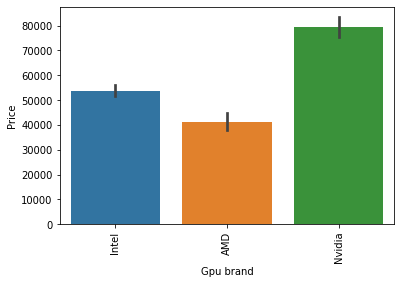

In [71]:
sns.barplot(x=data["Gpu brand"],y=data["Price"])
plt.xticks(rotation="vertical")
plt.show()

In [72]:
data.drop(columns="Gpu",inplace=True)

In [73]:
data.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,Processor,HDD,SSD,Gpu brand
0,Apple,Ultrabook,13.3,8,macOS,1.37,71378,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,13.3,8,macOS,1.34,47895,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,15.6,8,No OS,1.86,30636,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,15.4,16,macOS,1.83,135195,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,13.3,8,macOS,1.37,96095,0,1,226.983005,Intel Core i5,0,256,Intel


In [74]:
data["OpSys"].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [75]:
def os(text):
    if text=="Windows 10" or text=="Windows 7" or text=="Windows 10 S":
        return "Windows"
    elif text=="macOS" or text=="Mac OS X":
        return "Mac"
    else:
        return "Others/Linux/No OS"

In [76]:
data["os"] = data["OpSys"].apply(os)

In [85]:
data.sample(10)

,Company,TypeName,Inches,Ram,Weight,Price,TouchScreen,IPS,PPI,Processor,HDD,SSD,Gpu brand,os
575,Mediacom,Notebook,14.0,4,1.40,13266,0,0,157.350512,Other Intel Processor,0,32,Intel,Windows
1005,HP,Notebook,14.0,4,1.48,58607,0,0,111.935204,Intel Core i5,0,256,Intel,Windows
103,HP,Ultrabook,13.3,8,1.38,59620,0,1,165.632118,Intel Core i7,0,256,Nvidia,Windows
1096,Dell,Notebook,15.6,8,2.36,34035,0,0,141.211998,Intel Core i5,1000,0,AMD,Windows
848,HP,2 in 1 Convertible,13.3,8,1.28,121318,1,0,165.632118,Intel Core i5,0,256,Intel,Windows
12,Apple,Ultrabook,15.4,16,1.83,130001,0,1,220.534624,Intel Core i7,0,256,AMD,Mac
647,Razer,Gaming,14.0,16,1.95,138474,0,0,157.350512,Intel Core i7,0,256,Nvidia,Windows
932,HP,Notebook,15.6,4,1.86,15392,0,0,100.454670,Other Intel Processor,1000,0,Intel,Others/Linux/No OS
660,Dell,Notebook,14.0,8,1.56,65481,0,0,157.350512,Intel Core i5,0,256,Intel,Windows
197,HP,Notebook,13.3,8,1.49,51095,0,0,165.632118,Intel Core i5,0,512,Intel,Windows


In [78]:
data.drop(columns=["OpSys"],inplace=True)

In [79]:
data.head()

,Company,TypeName,Inches,Ram,Weight,Price,TouchScreen,IPS,PPI,Processor,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,13.3,8,1.37,71378,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,13.3,8,1.34,47895,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,15.6,8,1.86,30636,0,0,141.211998,Intel Core i5,0,256,Intel,Others/Linux/No OS
3,Apple,Ultrabook,15.4,16,1.83,135195,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,13.3,8,1.37,96095,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


<AxesSubplot:xlabel='os', ylabel='Price'>

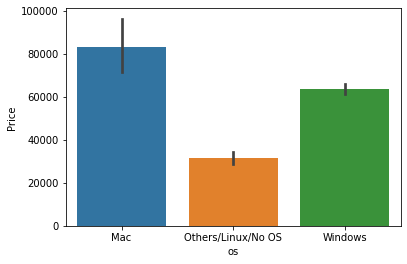

In [87]:
sns.barplot(x=data["os"],y=data["Price"])

F:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

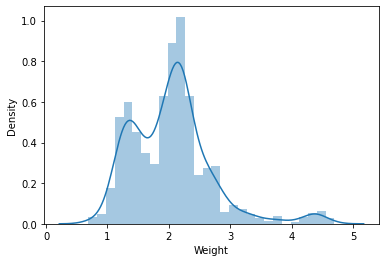

In [88]:
#Univariate analysis of weight column
sns.distplot(data["Weight"])
#It's bimodal

<AxesSubplot:xlabel='Weight', ylabel='Price'>

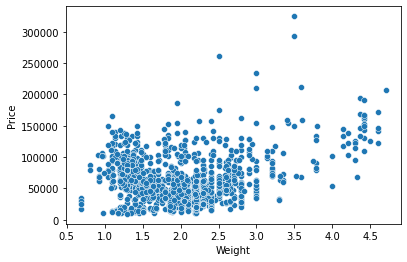

In [89]:
sns.scatterplot(x=data["Weight"],y=data["Price"])
#Weak correlation

In [90]:
data.corr()["Price"]

Inches         0.067328
Ram            0.742905
Weight         0.209867
Price          1.000000
TouchScreen    0.192917
IPS            0.253319
PPI            0.475368
HDD           -0.096892
SSD            0.670660
Name: Price, dtype: float64

<AxesSubplot:>

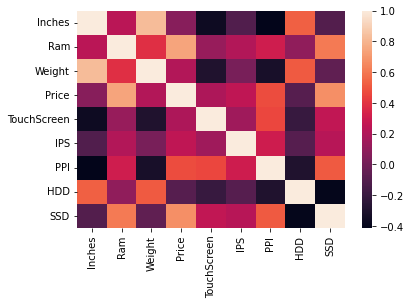

In [91]:
sns.heatmap(data.corr())

In [93]:
data.drop(columns=["Inches"],inplace=True)

In [94]:
data.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS,PPI,Processor,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636,0,0,141.211998,Intel Core i5,0,256,Intel,Others/Linux/No OS
3,Apple,Ultrabook,16,1.83,135195,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


<AxesSubplot:>

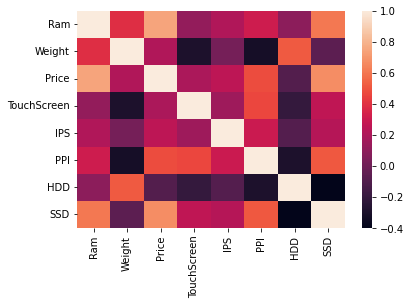

In [96]:
sns.heatmap(data.corr())

F:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

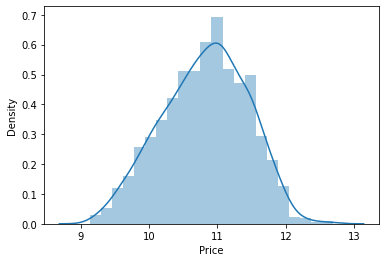

In [98]:
#log tranformation on Price distribution to remove skewness
sns.distplot(np.log(data["Price"]))

In [100]:
X = data.drop(columns=["Price"])
y = np.log(data["Price"])

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [103]:
X_train.head()
#categorical columns :- Company, TypeName, Processor, Gpu brand, os

,Company,TypeName,Ram,Weight,TouchScreen,IPS,PPI,Processor,HDD,SSD,Gpu brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Others/Linux/No OS
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows


In [109]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error


In [110]:
from sklearn.ensemble import RandomForestRegressor

In [112]:
## Random Forest
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.8856428805715316
MAE 0.1596519819734155
